<a href="https://colab.research.google.com/github/cnaresr/Visi-Komputer_TI2C/blob/main/Jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

## Praktikum 1

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


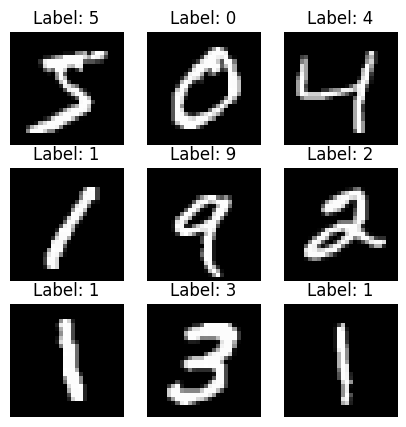

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

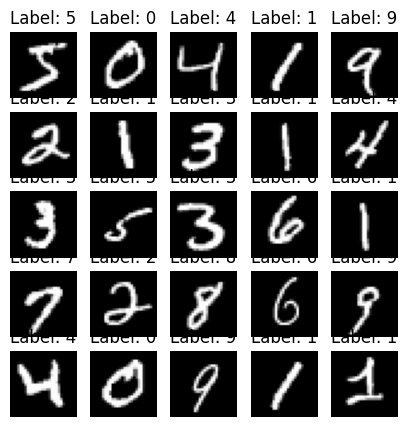

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.show()

## Praktikum 2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


## Praktikum 3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8962 - loss: 0.3592 - val_accuracy: 0.9773 - val_loss: 0.0765
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9805 - loss: 0.0643 - val_accuracy: 0.9868 - val_loss: 0.0534
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9877 - loss: 0.0399 - val_accuracy: 0.9842 - val_loss: 0.0521
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9915 - loss: 0.0273 - val_accuracy: 0.9847 - val_loss: 0.0579
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9942 - loss: 0.0190 - val_accuracy: 0.9873 - val_loss: 0.0572


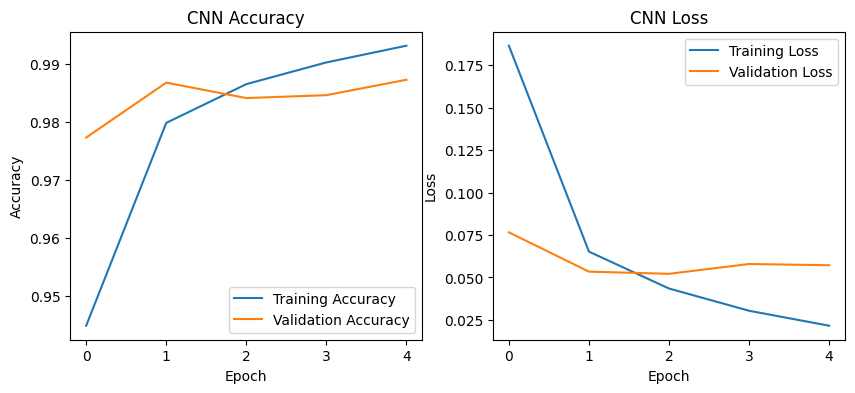

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) /255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.9027 - loss: 0.3160 - val_accuracy: 0.9870 - val_loss: 0.0470
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9857 - loss: 0.0465 - val_accuracy: 0.9865 - val_loss: 0.0467
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9912 - loss: 0.0288 - val_accuracy: 0.9903 - val_loss: 0.0356
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9931 - loss: 0.0199 - val_accuracy: 0.9880 - val_loss: 0.0460
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9951 - loss: 0.0139 - val_accuracy: 0.9883 - val_loss: 0.0463


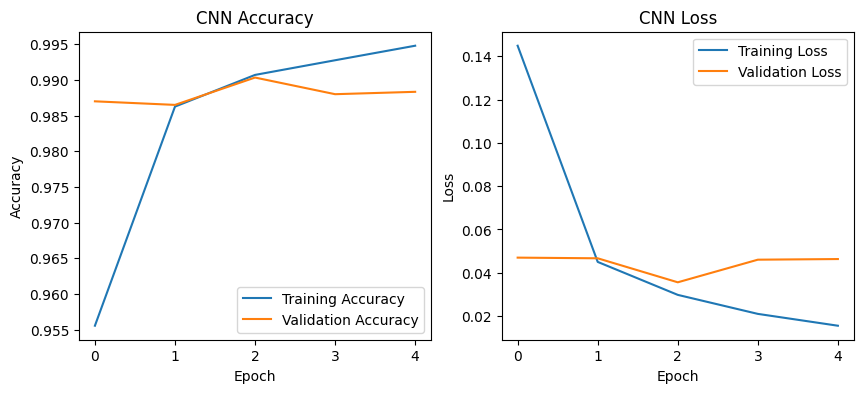

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) /255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum 4

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 43ms/step - accuracy: 0.3591 - loss: 1.7575 - val_accuracy: 0.5134 - val_loss: 1.3218
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.5704 - loss: 1.2203 - val_accuracy: 0.6208 - val_loss: 1.1031
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6311 - loss: 1.0503 - val_accuracy: 0.6642 - val_loss: 0.9682
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.6687 - loss: 0.9506 - val_accuracy: 0.6790 - val_loss: 0.9415
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.6968 - loss: 0.8719 - val_accuracy: 0.6972 - val_loss: 0.9031
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7261 - loss: 0.8029 - val_accuracy: 0.6968 - val_loss: 0.8925
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.7335 - loss: 0.7645 - val_accuracy: 0.7054 - val_loss: 0.8762
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 88s 46ms/step - accuracy: 0.7497 -

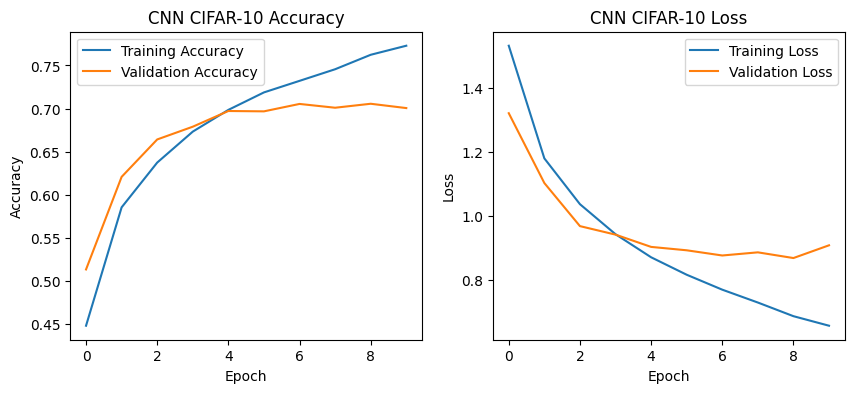

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 43ms/step - accuracy: 0.2790 - loss: 1.9354 - val_accuracy: 0.5100 - val_loss: 1.3640
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.4587 - loss: 1.4897 - val_accuracy: 0.5716 - val_loss: 1.2180
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 47ms/step - accuracy: 0.5120 - loss: 1.3569 - val_accuracy: 0.6236 - val_loss: 1.1147
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.5458 - loss: 1.2678 - val_accuracy: 0.6156 - val_loss: 1.1168
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 92s 52ms/step - accuracy: 0.5711 - loss: 1.2024 - val_accuracy: 0.6438 - val_loss: 1.0296
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.5931 - loss: 1.1528 - val_accuracy: 0.6594 - val_loss: 0.9978
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 103s 64ms/step - accuracy: 0.6068 - loss: 1.1003 - val_accuracy: 0.6606 - val_loss: 0.9861
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 155s 74ms/step - accuracy: 0.6199

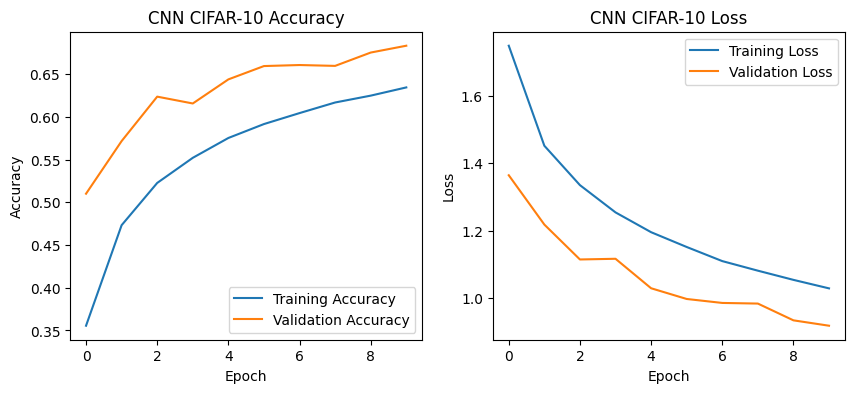

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum 5

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Acacuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 642s 455ms/step - accuracy: 0.4593 - loss: 1.5601 - val_accuracy: 0.5736 - val_loss: 1.2228
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 679s 453ms/step - accuracy: 0.5749 - loss: 1.2068 - val_accuracy: 0.5798 - val_loss: 1.1842
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 685s 455ms/step - accuracy: 0.6064 - loss: 1.1342 - val_accuracy: 0.6036 - val_loss: 1.1456
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 637s 453ms/step - accuracy: 0.6190 - loss: 1.0989 - val_accuracy: 0.6050 - val_loss: 1.1265
Epoch 5/5
 127/1407 ━━━━━━━━━━━━━━━━━━━━ 9:03 424ms/step - accuracy: 0.6585 - loss: 1.0372

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

for layer in base_model.layers[-2:]:
  layer.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Acacuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum 6


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Tugas

In [12]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====

import numpy as np
from PIL import Image, ImageOps
def preprocess_to_mnist_28x28(img_pil):
  """
  Langkah:
  - Konversi ke grayscale
  - Auto-contrast
  - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
  - Crop ke bounding box digit
  - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
  - Normalisasi ke [0,1] dan tambah axis channel
  """
  # Grayscale + autocontrast
  img = img_pil.convert('L')
  img = ImageOps.autocontrast(img)

  arr = np.array(img).astype(np.uint8)
  # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
  if arr.mean() > 127:
    img = ImageOps.invert(img)
    arr = np.array(img)

  # Binarisasi ringan untuk cari bbox digit
  thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
  mask = arr > thr
  if mask.any():
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max()
    x0, x1 = xs.min(), xs.max()
    img = img.crop((x0, y0, x1+1, y1+1))

  # Resize ke 20x20 dengan aspect ratio
  img.thumbnail((20, 20), Image.Resampling.LANCZOS)
  w, h = img.size

  # Pad ke 28x28 dan center
  canvas = Image.new('L', (28, 28), color=0)
  canvas.paste(img, ((28 - w)//2, (28 - h)//2))

  # Normalisasi ke [0,1]
  arr = np.array(canvas).astype('float32') / 255.0
  # Tambah channel dim (28,28,1)
  arr = arr[..., None]
  return canvas, arr

Saving 0-9 baru_1.jpg to 0-9 baru_1.jpg
Saving 0-9 baru_2.jpg to 0-9 baru_2.jpg
Saving 0-9 baru_3.jpg to 0-9 baru_3.jpg
Saving 0-9 baru_4.jpg to 0-9 baru_4.jpg
Saving 0-9 baru_5.jpg to 0-9 baru_5.jpg
Saving 0-9 baru_6.jpg to 0-9 baru_6.jpg
Saving 0-9 baru_7.jpg to 0-9 baru_7.jpg
Saving 0-9 baru_8.jpg to 0-9 baru_8.jpg
Saving 0-9 baru_9.jpg to 0-9 baru_9.jpg
Saving 0-9 baru_10.jpg to 0-9 baru_10.jpg


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8930 - loss: 0.3608 - val_accuracy: 0.9790 - val_loss: 0.0740
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9794 - loss: 0.0667 - val_accuracy: 0.9835 - val_loss: 0.0589
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9879 - loss: 0.0395 - val_accuracy: 0.9870 - val_loss: 0.0523
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9913 - loss: 0.0288 - val_accuracy: 0.9868 - val_loss: 0.0512
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9929 - loss: 0.0204 - val_accuracy: 0.9848 - val_loss: 0.0574


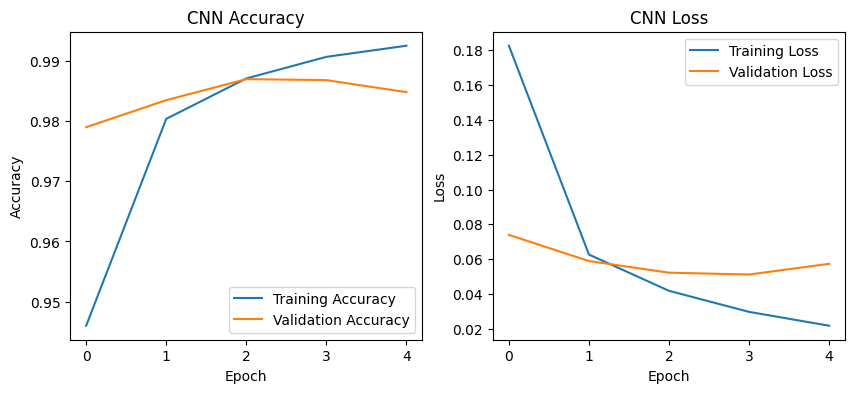

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) /255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


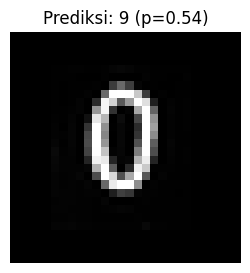

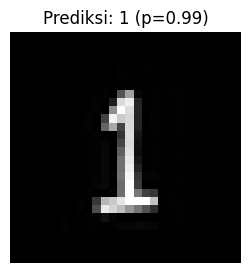

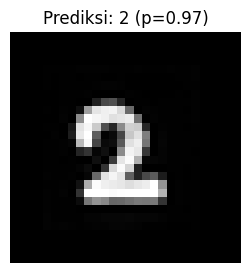

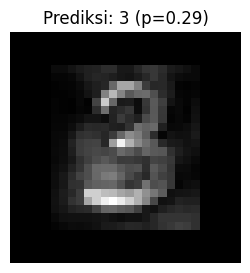

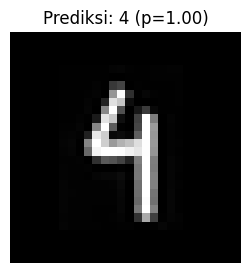

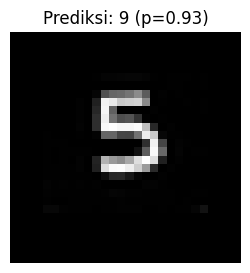

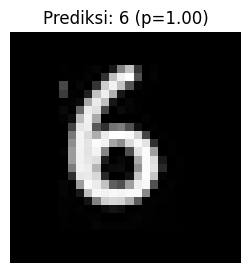

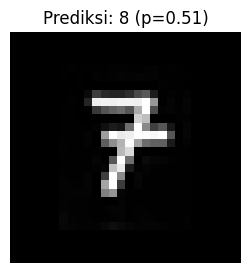

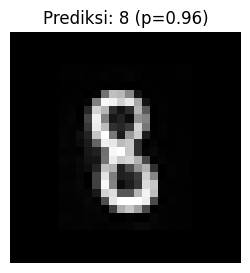

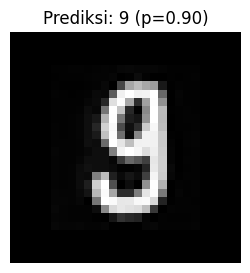

Rekap Prediksi (CNN):
- 0-9 baru_1.jpg -> 9 (p=0.539)
- 0-9 baru_2.jpg -> 1 (p=0.985)
- 0-9 baru_3.jpg -> 2 (p=0.966)
- 0-9 baru_4.jpg -> 3 (p=0.293)
- 0-9 baru_5.jpg -> 4 (p=1.000)
- 0-9 baru_6.jpg -> 9 (p=0.928)
- 0-9 baru_7.jpg -> 6 (p=0.999)
- 0-9 baru_8.jpg -> 8 (p=0.508)
- 0-9 baru_9.jpg -> 8 (p=0.959)
- 0-9 baru_10.jpg -> 9 (p=0.898)


In [14]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
  img_pil = Image.open(fname)
  disp, x = preprocess_to_mnist_28x28(img_pil) # disp: PIL untuk ditampilkan, x: (28,28,1)
  x_batch = np.expand_dims(x, axis=0) # (1,28,28,1)
  probs = model.predict(x_batch, verbose=0)[0] # shape (10,)
  pred = int(np.argmax(probs))
  conf = float(np.max(probs))

  results.append((fname, pred, conf))
  # Tampilkan hasil
  plt.figure(figsize=(3,3))
  plt.imshow(disp, cmap='gray')
  plt.title(f"Prediksi: {pred} (p={conf:.2f})")
  plt.axis('off')
  plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
  print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")

# Tugas fiks

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 0-9 Batch 1_1.jpg to 0-9 Batch 1_1 (1).jpg
Saving 0-9 Batch 1_2.jpg to 0-9 Batch 1_2 (1).jpg
Saving 0-9 Batch 1_3.jpg to 0-9 Batch 1_3 (1).jpg
Saving 0-9 Batch 1_4.jpg to 0-9 Batch 1_4 (1).jpg
Saving 0-9 Batch 1_5.jpg to 0-9 Batch 1_5 (1).jpg
Saving 0-9 Batch 1_6.jpg to 0-9 Batch 1_6 (1).jpg
Saving 0-9 Batch 1_7.jpg to 0-9 Batch 1_7 (1).jpg
Saving 0-9 Batch 1_8.jpg to 0-9 Batch 1_8 (1).jpg
Saving 0-9 Batch 1_9.jpg to 0-9 Batch 1_9 (1).jpg
Saving 0-9 Batch 1_10.jpg to 0-9 Batch 1_10 (1).jpg


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32") / 255.0

# bikin model CNN sederhana
model = keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# save model
model.save("model_mnist_cnn.h5")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.9002 - loss: 0.3229 - val_accuracy: 0.9867 - val_loss: 0.0471
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9848 - loss: 0.0483 - val_accuracy: 0.9897 - val_loss: 0.0340
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9903 - loss: 0.0295 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9908 - val_loss: 0.0337
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9908 - val_loss: 0.0353


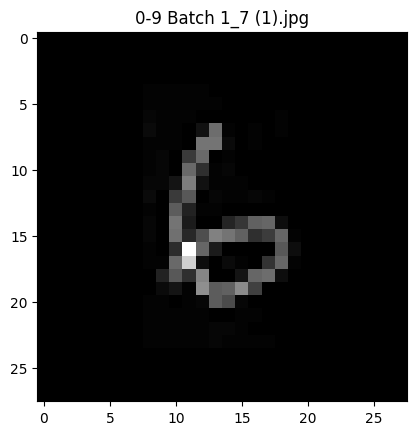

0-9 Batch 1_7 (1).jpg → Prediksi: 1 (prob: 0.114)


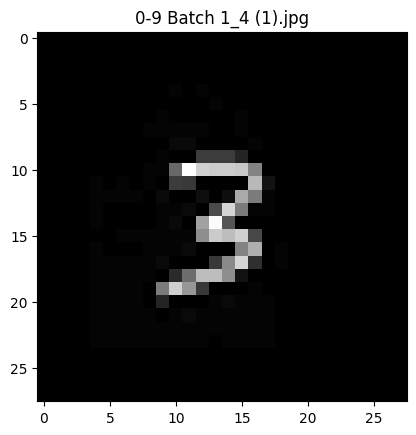

0-9 Batch 1_4 (1).jpg → Prediksi: 1 (prob: 0.123)


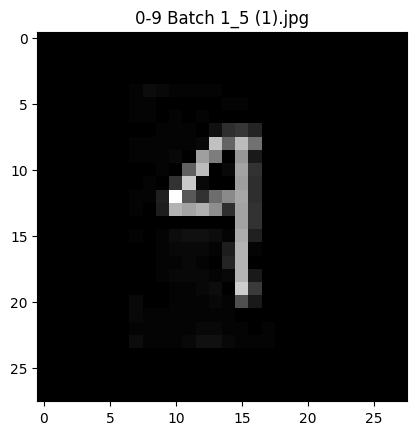

0-9 Batch 1_5 (1).jpg → Prediksi: 1 (prob: 0.120)


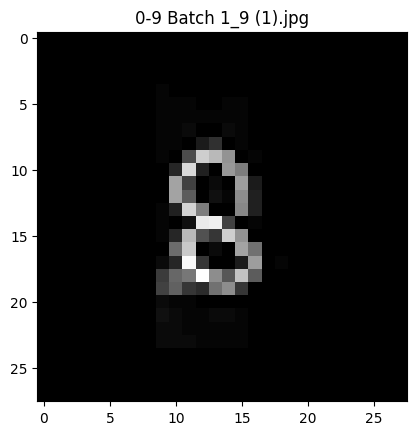

0-9 Batch 1_9 (1).jpg → Prediksi: 0 (prob: 0.117)


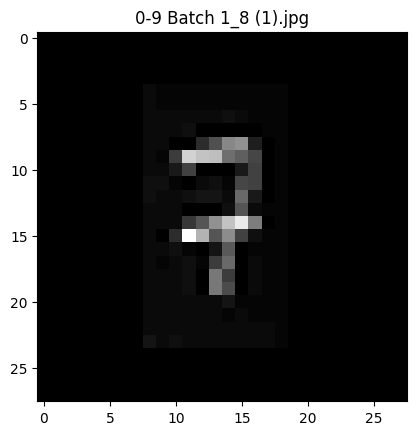

0-9 Batch 1_8 (1).jpg → Prediksi: 1 (prob: 0.127)


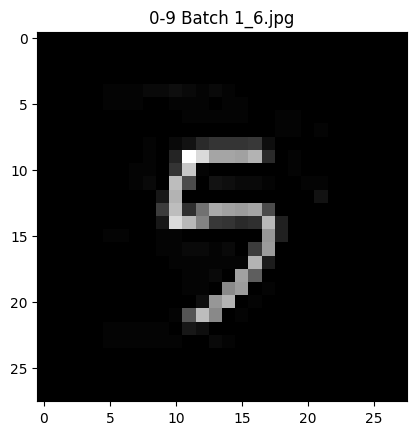

0-9 Batch 1_6.jpg → Prediksi: 1 (prob: 0.113)


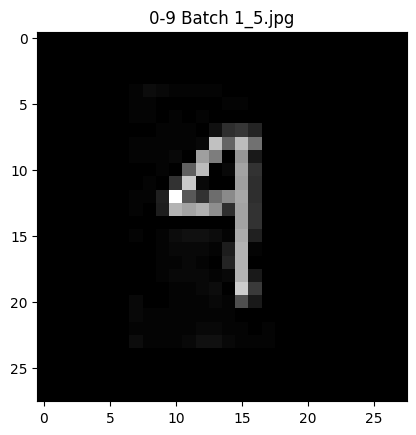

0-9 Batch 1_5.jpg → Prediksi: 1 (prob: 0.120)


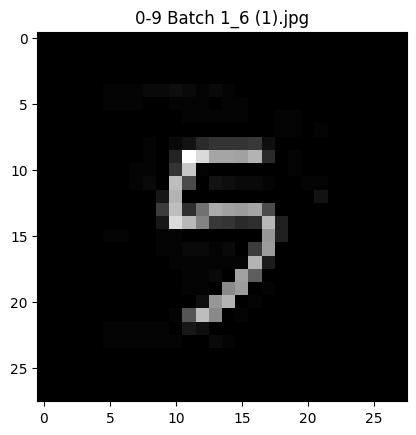

0-9 Batch 1_6 (1).jpg → Prediksi: 1 (prob: 0.113)


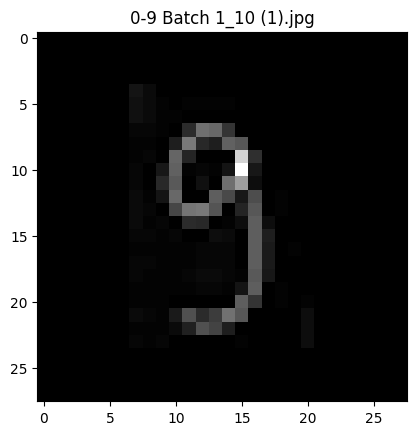

0-9 Batch 1_10 (1).jpg → Prediksi: 1 (prob: 0.120)


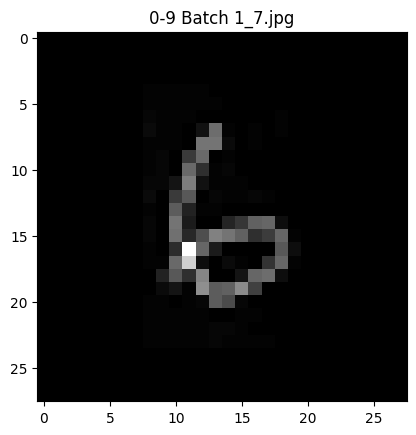

0-9 Batch 1_7.jpg → Prediksi: 1 (prob: 0.114)


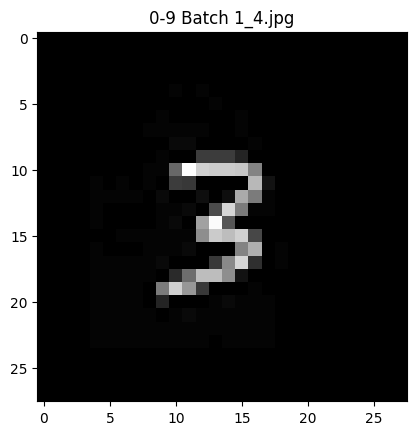

0-9 Batch 1_4.jpg → Prediksi: 1 (prob: 0.123)


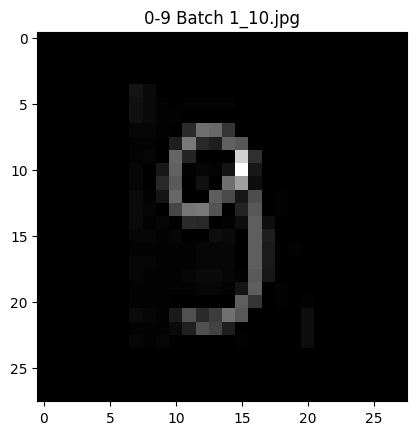

0-9 Batch 1_10.jpg → Prediksi: 1 (prob: 0.120)


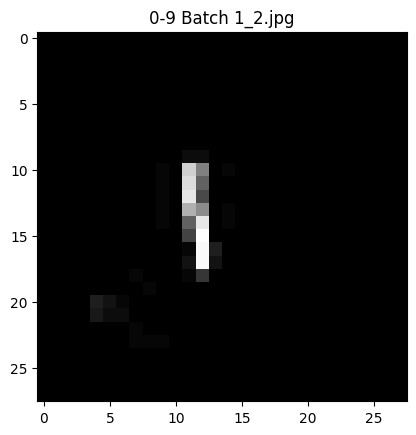

0-9 Batch 1_2.jpg → Prediksi: 1 (prob: 0.124)


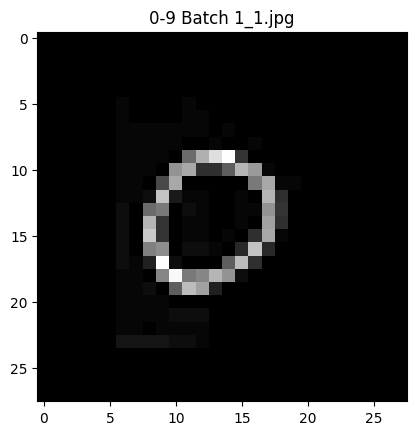

0-9 Batch 1_1.jpg → Prediksi: 0 (prob: 0.118)


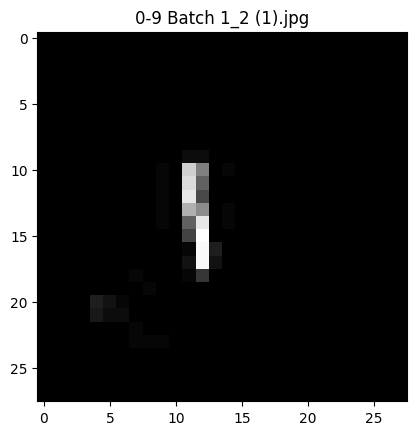

0-9 Batch 1_2 (1).jpg → Prediksi: 1 (prob: 0.124)


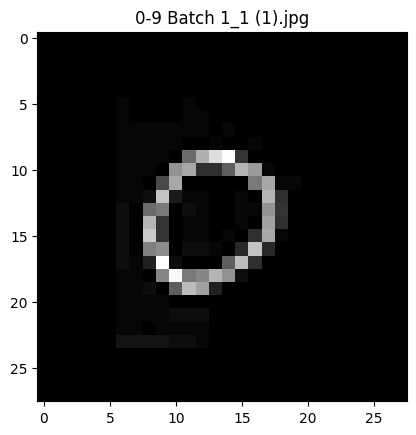

0-9 Batch 1_1 (1).jpg → Prediksi: 0 (prob: 0.118)


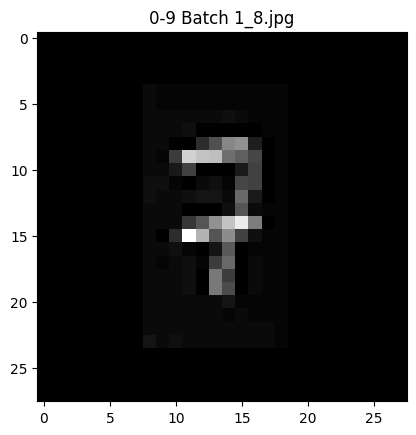

0-9 Batch 1_8.jpg → Prediksi: 1 (prob: 0.127)


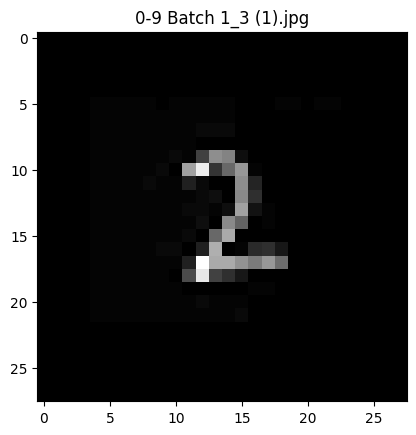

0-9 Batch 1_3 (1).jpg → Prediksi: 1 (prob: 0.123)


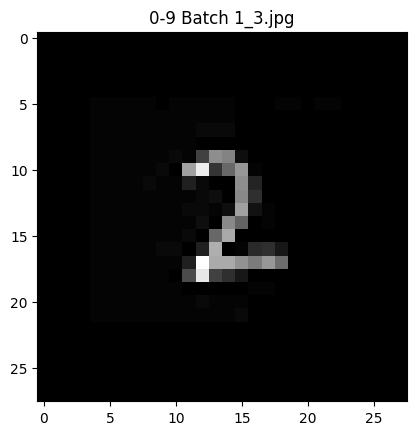

0-9 Batch 1_3.jpg → Prediksi: 1 (prob: 0.123)


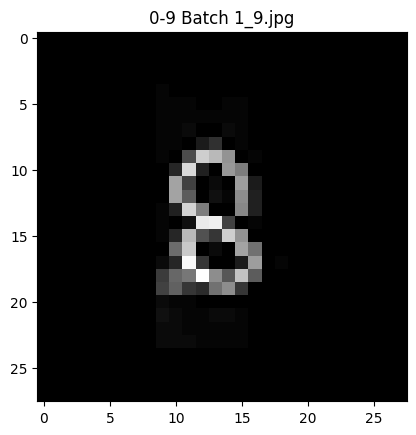

0-9 Batch 1_9.jpg → Prediksi: 0 (prob: 0.117)


In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import glob

# -------------------
# Fungsi preprocessing
# -------------------
def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    img.thumbnail((20,20), Image.Resampling.LANCZOS)
    w,h = img.size

    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28-w)//2, (28-h)//2))

    arr = np.array(canvas).astype('float32')/255.0
    return canvas, arr.reshape(28,28,1)

# -------------------
# Load model
# -------------------
# Kalau CNN (Keras)
from tensorflow import keras
model = keras.models.load_model("model_mnist_cnn.h5")

# Kalau SVM (sklearn)
# import joblib
# clf = joblib.load("svm_mnist.pkl")

# -------------------
# Prediksi semua file PNG/JPG di folder ini
# -------------------
for fn in glob.glob("*.png") + glob.glob("*.jpg"):
    img = Image.open(fn)
    disp, x = preprocess_to_mnist_28x28(img)

    plt.imshow(disp, cmap='gray')
    plt.title(fn)
    plt.show()

    # ==== CNN ====
    x_batch = np.expand_dims(x, axis=0)  # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]
    pred = np.argmax(probs)
    conf = np.max(probs)
    print(f"{fn} → Prediksi: {pred} (prob: {conf:.3f})")

    # ==== SVM ====
    # x_flat = x.reshape(-1, 784)
    # pred = clf.predict(x_flat)[0]
    # print(f"{fn} → Prediksi: {pred}")